In [322]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Datei mit unterschiedlicher Codierung einlesen
data_2019 = pd.read_csv('2019_SoSci_export_data_anonym.csv', encoding='ISO-8859-1', delimiter=';')
values_2019 = pd.read_csv('2019_SoSci_export_values.csv', encoding='UTF-16', delimiter='\t')
variables_2019 = pd.read_csv('2019_SoSci_export_variables.csv', encoding='UTF-16', delimiter='\t')

In [323]:
df_data_19 = pd.DataFrame (data_2019)

# DataFrame mit ausgewählten Spalten erstellen
selected_columns_19 = ['CASE', 'A009', 'A010', 'A010_05', 'A011', 'A011_07', 'A012', 'A012_01', 'A012_02', 'A012_03', 'A012_04', 'A012_05', 'A012_06', 'A012_07', 'A012_08', 'A012_09', 'A012_09a', 'A014', 'B003', 'B003_01', 'B003_02', 'B003_03', 'B003_04', 'B003_05', 'B003_06', 'B003_07', 'B003_07a', 'B004', 'B005_01', 'B006', 'B007_01', 'B008', 'B008_01', 'B008_02', 'B008_03', 'B008_04', 'B008_05', 'B008_06', 'B008_06a', 'B009', 'B009_01', 'B010', 'B015', 'B015_01', 'B015_02', 'B015_03', 'B015_04', 'B015_05', 'B015_06', 'B015_07', 'B015_08', 'B011', 'B011_03', 'B012', 'B013', 'B013_01', 'B016_CN', 'B016x01', 'B016x11', 'B016x12', 'B016x13', 'B016x02', 'B016x21', 'B016x22', 'C001', 'C001_01', 'C001_02', 'C001_03', 'C001_04', 'C001_05', 'C001_06', 'C001_07', 'C001_08', 'C001_08a', 'C001_09', 'C002', 'C002_01', 'C002_02', 'C002_03', 'C002_04', 'C002_05', 'C002_06', 'C002_07', 'C002_08', 'C002_08a', 'C002_09', 'C003', 'C003_01', 'C003_02', 'C003_03', 'C003_04', 'C003_05', 'C003_06', 'C003_07', 'C003_08', 'C003_09', 'C003_09a', 'C003_10', 'C004', 'C004_01', 'C004_02', 'C004_03', 'C004_04', 'C004_05', 'C004_05a', 'C004_06', 'C005', 'C005_01', 'C006', 'C006_01', 'C006_02', 'C006_03', 'C006_04', 'C006_05', 'C006_06', 'C006_07', 'C006_08', 'C006_08a', 'C006_09', 'C007_01', 'D008', 'D002', 'D001_01', 'D003', 'D004_01', 'D005_01', 'D006_01', 'D007']
df_questions_19 = df_data_19[selected_columns_19]

# Zeilen filtern, bei denen nach der Spalte A012_09a keine Einträge mehr folgen (alle Werte sind NaN)
result_rows_19 = df_questions_19[df_questions_19.iloc[:, df_questions_19.columns.get_loc('A012_09a')+1:].isna().all(axis=1)]

# gefundenen leeren Zeilen aus dem DataFrame entfernen und einen bereinigten DataFrame erzeugen 
df_cleanquest_19 = df_questions_19.drop(result_rows_19.index)
df_cleanquest_19 = df_cleanquest_19.drop(0)

# neuer DataFrame
print(df_cleanquest_19)

     CASE A009 A010 A010_05 A011 A011_07 A012 A012_01 A012_02 A012_03  ...  \
1      97  276    1     NaN    3     NaN    3       2       1       1  ...   
2     209  276    1     NaN    3     NaN    1       1       1       1  ...   
3     295  528    1     NaN    3     NaN    1       1       1       1  ...   
4     394  756    2     NaN    2     NaN    1       1       1       1  ...   
5     399  276    1     NaN    2     NaN    1       1       1       2  ...   
..    ...  ...  ...     ...  ...     ...  ...     ...     ...     ...  ...   
615  2133   36    1     NaN    1     NaN    1       2       1       1  ...   
616  2136  276    2     NaN    3     NaN    1       1       1       2  ...   
618  2147  276    4     NaN    1     NaN    5       2       2       2  ...   
619  2150  643    2     NaN    3     NaN    1       1       1       2  ...   
621  2229  276    2     NaN    2     NaN    1       1       1       1  ...   

    C006_09                        C007_01 D008 D002  \
1      

In [324]:
# DataFrame für values und variables erzeugen
df_values_19 = pd.DataFrame (values_2019)
df_variables_19 = pd.DataFrame (variables_2019)

In [325]:
# NFDI4Chem-Farben definieren
petrol_rgb = (0/255, 156/255, 188/255)
orange_rgb = (238/255, 116/255, 0/255)
yellow_rgb = (241/255, 222/255, 30/255)

# transparente NFDI4Chem Farben
petrol_rgb_light = sns.set_hls_values(color=petrol_rgb, l=0.7)
orange_rgb_light = sns.set_hls_values(color=orange_rgb, l=0.7)
yellow_rgb_light = sns.set_hls_values(color=yellow_rgb, l=0.7)
petrol_rgb_light2 = sns.set_hls_values(color=petrol_rgb, l=0.3)
orange_rgb_light2 = sns.set_hls_values(color=orange_rgb, l=0.3)
yellow_rgb_light2 = sns.set_hls_values(color=yellow_rgb, l=0.3)

# Farben als Paletten festlegen
NFDI4Chem = ('#009CBC', '#EE7400', '#F1DE1E', '#7f7f7f')
NFDI4Chem_trans = (petrol_rgb, orange_rgb, yellow_rgb, '#E30613', '#0072B6', '#95569E', petrol_rgb_light, orange_rgb_light, yellow_rgb_light, petrol_rgb_light2, orange_rgb_light2, yellow_rgb_light2)

## B03. Which kind of data do you collect in your research?
### Multiple selections possible.

In [326]:
# Spalten mit Namen, die "B003" enthalten, anzeigen
df_B003 = df_cleanquest_19.filter(like='B003')
df_B003

,B003,B003_01,B003_02,B003_03,B003_04,B003_05,B003_06,B003_07,B003_07a
1,5,2,1,2,2,2,1,2,Product Data (GC)
2,2,1,1,2,1,2,1,1,NaN
3,1,1,1,1,1,1,1,2,Spectrometer data
4,1,1,1,1,1,1,1,2,Mass spectrometric data
5,3,1,2,2,2,1,1,1,NaN
...,...,...,...,...,...,...,...,...,...
615,6,2,2,2,2,2,2,1,NaN
616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
618,0,1,1,1,1,1,1,1,NaN
619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [327]:
# Leeres Dictionary für die Werte erstellen
values_dict = {}

# For-Schleife, um Werte für die Spalten zu überprüfen
for col_name in df_B003:
    values_dict[col_name] = df_values_19[df_values_19["VAR"] == col_name]

# Ergebnisse anzeigen
for col_name, values_df in values_dict.items():
    print(f"Values for {col_name}:")
    print(values_df)
    print()

Values for B003:
Empty DataFrame
Columns: [VAR, RESPONSE, MEANING]
Index: []

Values for B003_01:
         VAR  RESPONSE        MEANING
299  B003_01         1  nicht gewählt
300  B003_01         2     ausgewählt

Values for B003_02:
         VAR  RESPONSE        MEANING
301  B003_02         1  nicht gewählt
302  B003_02         2     ausgewählt

Values for B003_03:
         VAR  RESPONSE        MEANING
303  B003_03         1  nicht gewählt
304  B003_03         2     ausgewählt

Values for B003_04:
         VAR  RESPONSE        MEANING
305  B003_04         1  nicht gewählt
306  B003_04         2     ausgewählt

Values for B003_05:
         VAR  RESPONSE        MEANING
307  B003_05         1  nicht gewählt
308  B003_05         2     ausgewählt

Values for B003_06:
         VAR  RESPONSE        MEANING
309  B003_06         1  nicht gewählt
310  B003_06         2     ausgewählt

Values for B003_07:
         VAR  RESPONSE        MEANING
311  B003_07         1  nicht gewählt
312  B003_07    

In [328]:
# Zeilen von Index 23 bis 31 anzeigen
selected_rows_B003 = df_variables_19.iloc[23:32]
selected_rows_B003

,VAR,LABEL,TYPE,INPUT,QUESTION
23,B003,Data types: Ausweichoption (negativ) oder Anza...,METRIC,SYSTEM,Which kind of data do you collect in your rese...
24,B003_01,Data types: Experimental data on synthesis,DICHOTOMOUS,CHECKBOX,Which kind of data do you collect in your rese...
25,B003_02,Data types: Simulation data,DICHOTOMOUS,CHECKBOX,Which kind of data do you collect in your rese...
26,B003_03,Data types: Spectroscopic data,DICHOTOMOUS,CHECKBOX,Which kind of data do you collect in your rese...
27,B003_04,"Data types: Microscopic data (e.g. SEM, TEM, ...)",DICHOTOMOUS,CHECKBOX,Which kind of data do you collect in your rese...
28,B003_05,Data types: Crystallographic data,DICHOTOMOUS,CHECKBOX,Which kind of data do you collect in your rese...
29,B003_06,Data types: Voltammetric data,DICHOTOMOUS,CHECKBOX,Which kind of data do you collect in your rese...
30,B003_07,Data types: Other data,DICHOTOMOUS,CHECKBOX,Which kind of data do you collect in your rese...
31,B003_07a,Data types: Other data (offene Eingabe),TEXT,OPEN,Which kind of data do you collect in your rese...


In [329]:
# Liste der Spaltennamen, die verarbeitet werden sollen
columns_to_process = ['B003','B003_01','B003_02','B003_03','B003_04','B003_05','B003_06','B003_07']

# Schleife um Zeilen zu durchsuchen, bei denen die Spalte "VAR" den aktuellen Spaltennamen (column) enthält. 
# Ergebnis in values_column speichern
for column in columns_to_process:
    values_column = df_values_19[df_values_19["VAR"] == column]

# Typ 'str' festlegen, damit die Werte/ Bedeutungen ausgetauscht werden können
    df_cleanquest_19[column] = df_cleanquest_19[column].astype(str)
    values_column["RESPONSE"] = values_column["RESPONSE"].astype(str)

/tmp/ipykernel_3207/207455260.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values_column["RESPONSE"] = values_column["RESPONSE"].astype(str)


In [330]:
# Spalten umbenennen, so dass Teildisziplin bekannt wird
# Dictionary erstellen
col_name_clear_B003 = {
    'B003': 'Ausweichoption (negativ) oder Anzahl',
    'B003_01': 'Experimental data from synthesis',
    'B003_02': 'Simulation data or quantum mechanical calculations',
    'B003_03': 'Spectroscopic data',
    'B003_04': 'Microscopic data',
    'B003_05': 'Crystallographic data',
    'B003_06': 'Voltammetric data',
    'B003_07': 'other data',
    'B003_07a': 'open text'
}

df_B003 = df_B003.rename(columns=col_name_clear_B003)

# Anzahl der Vorkommen von 2 in den Spalten B003_01 - B003_07 zählen und Liste in einen df schreiben
df_B003_count = df_B003.iloc[:, 0:8].apply(lambda col: (col == '2').sum()).to_frame()

# Spalten umbenennen
df_B003_count.reset_index(inplace=True)
df_B003_count.rename(columns={'index':'kind of data', 0:'quantity'}, inplace=True)

# Index 0 löschen, da er die Beschreibung enthält
df_B003_count = df_B003_count.drop(0)

df_B003_count

,kind of data,quantity
1,Experimental data from synthesis,333
2,Simulation data or quantum mechanical calculat...,199
3,Spectroscopic data,460
4,Microscopic data,208
5,Crystallographic data,195
6,Voltammetric data,89
7,other data,108


In [331]:
# Freitextantworten und Häufigkeit zur Frage zählen und in einen df schreiben ->Spalte B003_07a
df_B003_a = df_cleanquest_19['B003_07a'].value_counts().to_frame()

# Spalten umbenennen
df_B003_a.reset_index(inplace=True)
df_B003_a.rename(columns={'index': 'kind of data', 'B003_07a': 'quantity'}, inplace=True)

df_B003_a

,kind of data,quantity
0,Spectrometric data,2
1,Chromatography data,2
2,Mass spectrometry,2
3,Product Data (GC),1
4,100 different interfaces to LIMS mainly PDF im...,1
...,...,...
100,"chromatographic data, mass spectrometric data",1
101,ai,1
102,Radiolabelling data,1
103,electrochemical cycling and rate capability,1


In [332]:
# Werte mit gleicher Bedeutung zusammenführen
df_B003_a['kind of data'] = df_B003_a['kind of data'].apply(lambda x: 'Spectrometric data' if 'spectromet' in x.lower() or 'ms' in x.lower() or 'mass' in x.lower() else 
                                                               ('Chromatographic data' if 'chrom' in x.lower() or 'hplc' in x.lower() else 
                                                                ('Scattering data' if 'scat' in x.lower() else
                                                                 ('Impedance data' if 'impe' in x.lower() else
                                                                  ('Experimental data from synthesis' if 'exp' in x.lower() else
                                                                   ('Biological assays' if 'assay' in x.lower() else
                                                                    ('Kinetic data' if 'kin' in x.lower() else x)))))))

# Gruppieren der Bedeutungen und Summierung durchführen
df_B003_grouped = df_B003_a.groupby('kind of data')['quantity'].sum().reset_index()

# Ergebnisse nach Häufigkeit sortieren
df_B003_sorted = df_B003_grouped.sort_values(by='quantity', ascending=False)

print(df_B003_sorted)

                        kind of data  quantity
40                Spectrometric data        21
7               Chromatographic data         9
3                  Biological assays         6
14  Experimental data from synthesis         6
37                   Scattering data         3
..                               ...       ...
30    Quantity data and quality data         1
31                    Questionnaires         1
32                       Radiography         1
1                    Analytical Data         1
66                           various         1

[67 rows x 2 columns]


In [385]:
# Zusammenführen der DataFrames anhand des gemeinsamen Schlüssels 'kind of data'
df_B003_merge = pd.merge(df_B003_sorted, df_B003_count, on='kind of data', how='outer')

# Zusammenführen von quantity_x und quantity_y und Summieren der Werte
df_B003_merge['merged_quantity'] = df_B003_merge[['quantity_x', 'quantity_y']].sum(axis=1)

# Löschen der ursprünglichen Spalten
df_B003_merge.drop(['quantity_x', 'quantity_y'], axis=1, inplace=True)

df_B003_merge

,kind of data,merged_quantity
0,Spectrometric data,21.0
1,Chromatographic data,9.0
2,Biological assays,6.0
3,Experimental data from synthesis,339.0
4,Scattering data,3.0
...,...,...
68,Spectroscopic data,460.0
69,Microscopic data,208.0
70,Crystallographic data,195.0
71,Voltammetric data,89.0


In [386]:
# Df nach 'merged_quantity' sortieren
df_B003_msorted = df_B003_merge.sort_values(by='merged_quantity', ascending=False)

print(df_B003_msorted)

                                         kind of data  merged_quantity
68                                 Spectroscopic data            460.0
3                    Experimental data from synthesis            339.0
69                                   Microscopic data            208.0
67  Simulation data or quantum mechanical calculat...            199.0
70                              Crystallographic data            195.0
..                                                ...              ...
34                                      magnetic data              1.0
35                                Radiolabelling data              1.0
37                  Gas electron diffraction patterns              1.0
38                                           Archives              1.0
36                                        SS-NMR data              1.0

[73 rows x 2 columns]


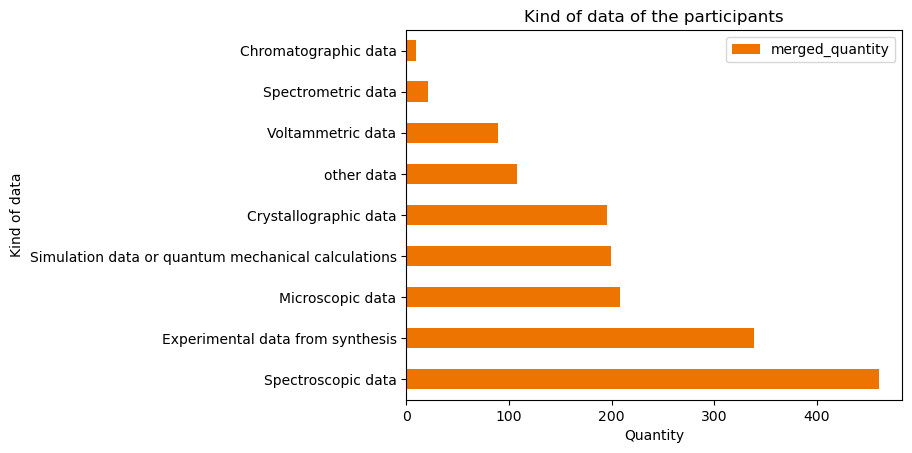

In [335]:
# Spalte "kind of data" als Index setzen
df_B003_msorted.set_index('kind of data', inplace=True)

# Zeilen mit einer Quantity von über 10 filtern
df_B003_filtered = df_B003_msorted[df_B003_msorted['merged_quantity'] > 6]

# Balkendiagramm plotten
df_B003_filtered.plot.barh(color=orange_rgb)
plt.xlabel('Quantity')
plt.ylabel('Kind of data')
plt.title('Kind of data of the participants')

plt.show()

## B04. Do you collect data in a non-electronic form which are electronically saved only to a later point in time?

In [340]:
# Df erstellen, der nur die Werte in der Spalte "VAR" gleich "B004"enthält
values_B004=df_values_19[df_values_19["VAR"]=="B004"]

# Typ 'str' festlegen, damit die Werte/ Bedeutungen ausgetauscht werden können
df_cleanquest_19["B004"] = df_cleanquest_19["B004"].astype(str)
values_B004["RESPONSE"] = values_B004["RESPONSE"].astype(str)

# Zahlen in den Zellen gegen die Bedeutung ersetzen
df_cleanquest_19["B004-m"]=df_cleanquest_19["B004"].map(values_B004.drop_duplicates("RESPONSE").set_index("RESPONSE")["MEANING"])
df_cleanquest_19["B004-m"]

# Zellen mit gleichem Inhalt zählen und neuen df erzeugen
df_B004 = df_cleanquest_19['B004-m'].value_counts().to_frame()

# Spalten benennen
df_B004.reset_index(inplace=True)
df_B004.rename(columns={'index': 'answer', 'B004-m': 'quantity'}, inplace=True)

df_B004

/tmp/ipykernel_3207/1957634243.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values_B004["RESPONSE"] = values_B004["RESPONSE"].astype(str)


,answer,quantity
0,No,305
1,Yes,220
2,No Answer,48


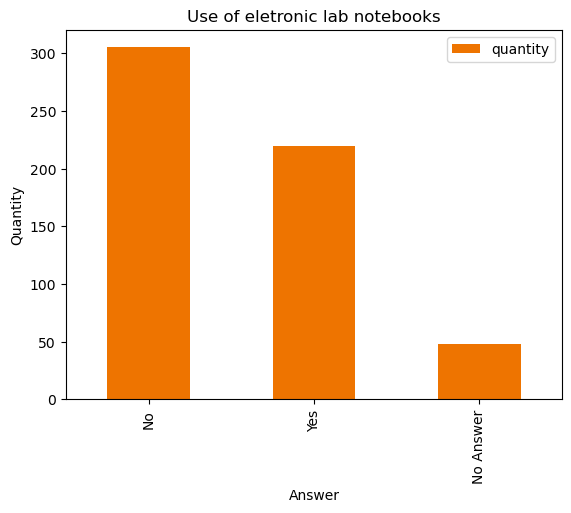

In [341]:
# Spalte "answer" als Index setzen
df_B004.set_index('answer', inplace=True)

 # Balkendiagramm plotten
df_B004.plot.bar(color=orange_rgb)
plt.xlabel('Answer')
plt.ylabel('Quantity')
plt.title('Use of eletronic lab notebooks')

plt.show()

### If yes:
## B05. Which data do you record this way?

In [ ]:
# Spalten mit Namen, die "B005" enthalten, anzeigen
df_B005 = df_cleanquest_19.filter(like='B005')
df_B005

In [ ]:
# Freitextantworten und Häufigkeit zur Frage zählen und in einen df schreiben ->Spalte B005_01
df_B005_counted = df_B005['B005_01'].value_counts().to_frame()
df_B005_counted

Diese Frage wurde nur den Personen gezeigt, die angegeben haben, dass sie ein Elektronischen Lab Notebook (ELN) verwenden. Von 220 Personen, die ein ELN einsetzen, haben 177 eine Begründung geliefert.

## B06. Are all steps of your data analysis process seamless digital?

In [342]:
# Df erstellen, der nur die Werte in der Spalte "VAR" gleich "B006"enthält
values_B006=df_values_19[df_values_19["VAR"]=="B006"]

# Typ 'str' festlegen, damit die Werte/ Bedeutungen ausgetauscht werden können
df_cleanquest_19["B006"] = df_cleanquest_19["B006"].astype(str)
values_B006["RESPONSE"] = values_B006["RESPONSE"].astype(str)

# Zahlen in den Zellen gegen die Bedeutung ersetzen
df_cleanquest_19["B006-m"]=df_cleanquest_19["B006"].map(values_B006.drop_duplicates("RESPONSE").set_index("RESPONSE")["MEANING"])
df_cleanquest_19["B006-m"]

# Zellen mit gleichem Inhalt zählen und neuen df erzeugen
value_counts = df_cleanquest_19['B006-m'].value_counts()
df_B006 = df_cleanquest_19['B006-m'].value_counts().to_frame()

# Spalten umbenennen
df_B006.reset_index(inplace=True)
df_B006.rename(columns={'index': 'answer', 'B006-m': 'quantity'}, inplace=True)

df_B006

/tmp/ipykernel_3207/3357503443.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values_B006["RESPONSE"] = values_B006["RESPONSE"].astype(str)


,answer,quantity
0,Yes,328
1,No,193
2,No answer,24


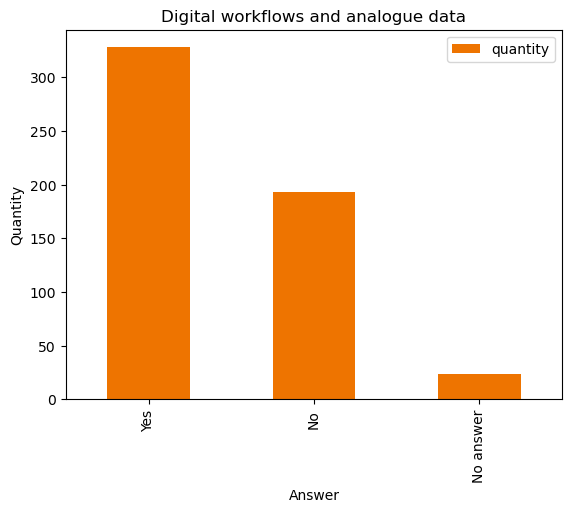

In [343]:
# Spalte "answer" als Index setzen
df_B006.set_index('answer', inplace=True)

# Balkendiagramm plotten
df_B006.plot.bar(color=orange_rgb)
plt.xlabel('Answer')
plt.ylabel('Quantity')
plt.title('Digital workflows and analogue data')

plt.show()

### If no:
## B07. Can you describe the data analysis steps which you perform without software in your most old-fashioned method?

In [344]:
# Spalten mit Namen, die "B007" enthalten, anzeigen
df_B007 = df_cleanquest_19.filter(like='B007')
df_B007

,B007_01
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
...,...
615,"assigning all NMR, IR and MS data"
616,NaN
618,NaN
619,NaN


In [345]:
# Zellen mit gleichem Inhalt zählen und neuen df erzeugen
df_B007_01 = df_B007['B007_01'].value_counts().to_frame()
df_B007_01

,B007_01
#NAME?,4
no,3
No,2
tranfer the data to an excel worksheet,1
"Print-out GC-MS or MS data, peak assignment, take photo, manually include in database.",1
...,...
evaluation of spectra and other measurements,1
manually entering data from elemental analysis and mass spectrometry\nMeasuring and calculating retention factors from dc's\npartially nmr assignments,1
"comparing the reults with the literature (peak positions, microscopic textures...)",1
For the contact angle measurements I take a picture of the image shown on the desktop and calculate the mean value of at least five measurements by excel/origin,1


Diese Frage wurde nur den Personen gezeigt, die angegeben haben, dass sie kein digitalen Daten im analogen Kontext verwenden. Von 328 Personen, haben 173 Schritte oder einzelne Begründungen genannt.

## B08. Which version of your data do you archive at the project’s end?
### Multiple selections possible.

In [346]:
# Spalten mit Namen, die "B001" enthalten, anzeigen
df_B008 = df_cleanquest_19.filter(like='B008')
df_B008

,B008,B008_01,B008_02,B008_03,B008_04,B008_05,B008_06,B008_06a
1,1,1,1,1,2,1,1,NaN
2,2,1,2,2,1,1,1,NaN
3,2,1,2,2,1,1,1,NaN
4,3,2,2,2,1,1,1,NaN
5,3,2,2,2,1,1,1,NaN
...,...,...,...,...,...,...,...,...
615,4,2,2,2,2,1,1,NaN
616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
618,0,1,1,1,1,1,1,NaN
619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [347]:
#Liste der Spaltennamen, die verarbeitet werden sollen
columns_to_process = ['B008','B008_01','B008_02','B008_03','B008_04','B008_05','B008_06','B008_06a']

# Schleife um Zeilen zu durchsuchen, bei denen die Spalte "VAR" den aktuellen Spaltennamen (column) enthält. 
# Ergebnis in values_column speichern.
for column in columns_to_process:
    values_column = df_values_19[df_values_19["VAR"] == column]

# Typ 'str' festlegen, damit die Werte/ Bedeutungen ausgetauscht werden können
    df_cleanquest_19[column] = df_cleanquest_19[column].astype(str)
    values_column["RESPONSE"] = values_column["RESPONSE"].astype(str)

/tmp/ipykernel_3207/2327364092.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values_column["RESPONSE"] = values_column["RESPONSE"].astype(str)


In [348]:
# Leeres Dictionary für die Werte erstellen
values_dict = {}

# For-Schleife
for col_name in df_B008:
    values_dict[col_name] = df_values_19[df_values_19["VAR"] == col_name]

# Ergebnisse anzeigen
for col_name, values_df in values_dict.items():
    print(f"Values for {col_name}:")
    print(values_df)
    print()

Values for B008:
Empty DataFrame
Columns: [VAR, RESPONSE, MEANING]
Index: []

Values for B008_01:
         VAR  RESPONSE        MEANING
321  B008_01         1  nicht gewählt
322  B008_01         2     ausgewählt

Values for B008_02:
         VAR  RESPONSE        MEANING
323  B008_02         1  nicht gewählt
324  B008_02         2     ausgewählt

Values for B008_03:
         VAR  RESPONSE        MEANING
325  B008_03         1  nicht gewählt
326  B008_03         2     ausgewählt

Values for B008_04:
         VAR  RESPONSE        MEANING
327  B008_04         1  nicht gewählt
328  B008_04         2     ausgewählt

Values for B008_05:
         VAR  RESPONSE        MEANING
329  B008_05         1  nicht gewählt
330  B008_05         2     ausgewählt

Values for B008_06:
         VAR  RESPONSE        MEANING
331  B008_06         1  nicht gewählt
332  B008_06         2     ausgewählt

Values for B008_06a:
Empty DataFrame
Columns: [VAR, RESPONSE, MEANING]
Index: []



In [349]:
# Zeilen von Index 36 bis 43 anzeigen
selected_rows_B008 = df_variables_19.iloc[36:44]
selected_rows_B008

,VAR,LABEL,TYPE,INPUT,QUESTION
36,B008,Data type archiving: Ausweichoption (negativ) ...,METRIC,SYSTEM,Which version of your data do you archive at t...
37,B008_01,Data type archiving: Raw data (means also simu...,DICHOTOMOUS,CHECKBOX,Which version of your data do you archive at t...
38,B008_02,Data type archiving: Processed data,DICHOTOMOUS,CHECKBOX,Which version of your data do you archive at t...
39,B008_03,Data type archiving: Analysed data,DICHOTOMOUS,CHECKBOX,Which version of your data do you archive at t...
40,B008_04,Data type archiving: All data,DICHOTOMOUS,CHECKBOX,Which version of your data do you archive at t...
41,B008_05,Data type archiving: I delete with caution dat...,DICHOTOMOUS,CHECKBOX,Which version of your data do you archive at t...
42,B008_06,Data type archiving: Other data,DICHOTOMOUS,CHECKBOX,Which version of your data do you archive at t...
43,B008_06a,Data type archiving: Other data (offene Eingabe),TEXT,OPEN,Which version of your data do you archive at t...


In [350]:
# Spalten umbenennen, so dass Art der Daten bekannt wird
# Dictionary erstellen
col_name_clear_B008 = {
    'B008': 'Ausweichoption (negativ) oder Anzahl',
    'B008_01': 'Raw data',
    'B008_02': 'Processed data',
    'B008_03': 'Analysed data',
    'B008_04': 'All data',
    'B008_05': 'I delete with caution data',
    'B008_06': 'Other data',
    'B008_06a': 'open text'
}

df_B008 = df_B008.rename(columns=col_name_clear_B008)

# Anzahl der Vorkommen von 2 in den Spalten B008_01 - B008_06 zählen und einen df erzeugen
df_B008_count = df_B008.iloc[:, 0:7].apply(lambda col: (col == '2').sum()).to_frame()

# Spalten umbenennen
df_B008_count.reset_index(inplace=True)
df_B008_count.rename(columns={'index':'kind of archived data', 0:'quantity'}, inplace=True)

# Index 0 löschen
df_B008_count = df_B008_count.drop(0)

df_B008_count

,kind of archived data,quantity
1,Raw data,309
2,Processed data,269
3,Analysed data,287
4,All data,308
5,I delete with caution data,73
6,Other data,13


In [351]:
# Freitextantworten und Häufigkeit zur Frage anzeigen ->Spalte B008_06a
df_B008_a = df_cleanquest_19['B008_06a'].value_counts().to_frame()

# Spalten umbenennen
df_B008_a.reset_index(inplace=True)
df_B008_a.rename(columns={'index': 'kind of archived data', 'B008_06a': 'quantity'}, inplace=True)

df_B008_a

,kind of archived data,quantity
0,nan,579
1,also raw handwritten data from the field,1
2,processed / analysed data belonging to specifi...,1
3,Spectroscopic simulation,1
4,Only data which is deemed to be essential is s...,1
5,scripts used for the analysis,1
6,Results of further interpretation,1
7,scripts,1
8,on paper: all data,1
9,digitized (scanned) notes and mathematical der...,1


In [352]:
# Werte mit gleicher Bedeutung zusammenführen
df_B008_a['kind of archived data'] = df_B008_a['kind of archived data'].apply(lambda x: 'Simulation data' if 'sim' in x.lower() else 
                                                               ('I delete with caution data' if 'delete' in x.lower() else 
                                                                ('Metadata' if 'meta' in x.lower() else
                                                                 ('Raw data' if 'raw' in x.lower() else x))))

# Gruppieren und Summierung durchführen
df_B008_grouped = df_B008_a.groupby('kind of archived data')['quantity'].sum().reset_index()

# Ergebnisse nach Häufigkeit sortieren
df_B008_sorted = df_B008_grouped.sort_values(by='quantity', ascending=False)

#Index 7 löschen, da er die NAN Werte beinhaltet
df_B008_sorted = df_B008_sorted.drop(7)

print(df_B008_sorted)

                                kind of archived data  quantity
3                                            Raw data         2
5                                     Simulation data         2
0                          I delete with caution data         1
1                                            Metadata         1
2   Only data which is deemed to be essential is s...         1
4                   Results of further interpretation         1
6   digitized (scanned) notes and mathematical der...         1
8                                  on paper: all data         1
9   processed / analysed data belonging to specifi...         1
10                                            scripts         1
11                      scripts used for the analysis         1


In [387]:
# Dfs anhand des gemeinsamen Schlüssels 'kind of archived data' zusammenführen
df_B008_merge = pd.merge(df_B008_count, df_B008_sorted, on='kind of archived data', how='outer')

# Spalten quantity_x und quantity_y zusammenführen zu einer Spalte und Werte summieren
df_B008_merge['merged_quantity'] = df_B008_merge[['quantity_x', 'quantity_y']].sum(axis=1)

# Ursprüngliche Spalten löschen
df_B008_merge.drop(['quantity_x', 'quantity_y'], axis=1, inplace=True)

# Ergebnisse nach Häufigkeit sortieren
df_B008_msorted = df_B008_merge.sort_values(by='merged_quantity', ascending=False)

df_B008_msorted

,kind of archived data,merged_quantity
0,Raw data,311.0
3,All data,308.0
2,Analysed data,287.0
1,Processed data,269.0
4,I delete with caution data,74.0
5,Other data,13.0
6,Simulation data,2.0
7,Metadata,1.0
8,Only data which is deemed to be essential is s...,1.0
9,Results of further interpretation,1.0


In [354]:
# Zeile mit Index 5 löschen, weil sie in den Freitextantworten aufgeschlüsselt wurde und als solche eingefügt wurden.
df_B008_msorted = df_B008_msorted.drop(5)

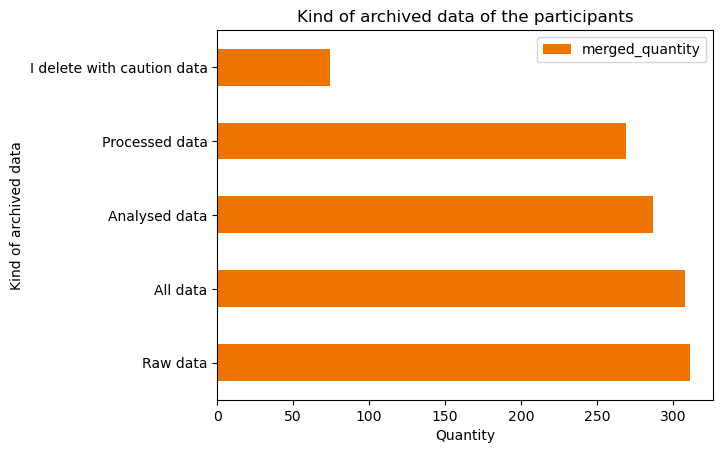

In [355]:
# Spalte "kind of archived data" als Index setzen
df_B008_msorted.set_index('kind of archived data', inplace=True)

# Filtere die Zeilen mit einer Quantity von über 70
df_B008_merge_filter = df_B008_msorted[df_B008_msorted['merged_quantity'] > 70]

# Balkendiagramm plotten
df_B008_merge_filter.plot.barh(color=orange_rgb)
plt.xlabel('Quantity')
plt.ylabel('Kind of archived data')
plt.title('Kind of archived data of the participants')

plt.show()

## B09. Do you have in your institute/working group rules for how and where data needs to be archived?

In [356]:
# Spalten mit Namen, die "B009" enthalten, anzeigen
df_B009 = df_cleanquest_19.filter(like='B009')
df_B009

,B009,B009_01
1,3,NaN
2,1,rules required by the publishers
3,2,NaN
4,3,NaN
5,1,"All data should be documented, not always digi..."
...,...,...
615,1,all dt must be saved to the Institutional data...
616,NaN,NaN
618,-9,NaN
619,NaN,NaN


In [357]:
# Leeres Dictionary für die Werte erstellen
values_dict = {}

# For-Schleife um Zeilen zu durchsuchen, bei denen die Spalte "VAR" den aktuellen Spaltennamen (column) enthält. 
for col_name in df_B009:
    values_dict[col_name] = df_values_19[df_values_19["VAR"] == col_name]

# Ergebnisse anzeigen
for col_name, values_df in values_dict.items():
    print(f"Values for {col_name}:")
    print(values_df)
    print()

Values for B009:
      VAR  RESPONSE            MEANING
333  B009         1                Yes
334  B009         2                 No
335  B009         3          No answer
336  B009        -9  nicht beantwortet

Values for B009_01:
Empty DataFrame
Columns: [VAR, RESPONSE, MEANING]
Index: []



In [358]:
# Ergebnis in values_B009 speichern
values_B009=df_values_19[df_values_19["VAR"]=="B009"]

# Typ 'str' festlegen, damit die Werte/ Bedeutungen ausgetauscht werden können
df_cleanquest_19["B009"] = df_cleanquest_19["B009"].astype(str)
values_B009["RESPONSE"] = values_B009["RESPONSE"].astype(str)

# Zahlen in den Zellen gegen die Bedeutung ersetzen
df_cleanquest_19["B009-m"]=df_cleanquest_19["B009"].map(values_B009.drop_duplicates("RESPONSE").set_index("RESPONSE")["MEANING"])
df_cleanquest_19["B009-m"]

# Zellen mit gleichem Inhalt zählen und neuen df erzeugen
df_B009 = df_cleanquest_19['B009-m'].value_counts().to_frame()

# Spalten umbenennen
df_B009.reset_index(inplace=True)
df_B009.rename(columns={'index': 'group rules', 'B009-m': 'quantity'}, inplace=True)

df_B009

/tmp/ipykernel_3207/3140299260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values_B009["RESPONSE"] = values_B009["RESPONSE"].astype(str)


,group rules,quantity
0,Yes,230
1,No,201
2,No answer,77
3,nicht beantwortet,2


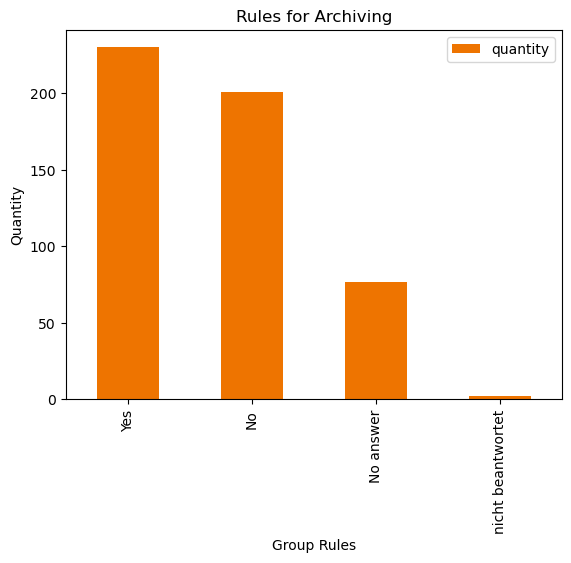

In [359]:
# Spalte "group rules" als Index setzen
df_B009.set_index('group rules', inplace=True)

#Säulendiagramm plotten
df_B009.plot.bar(color=orange_rgb)
plt.xlabel('Group Rules')
plt.ylabel('Quantity')
plt.title('Rules for Archiving')

plt.show()

## C03. How do you share your data outside your working group?
### Multiple selections possible.

In [360]:
# Spalten mit Namen, die "C003" enthalten, anzeigen
df_C003 = df_cleanquest_19.filter(like='C003')
df_C003

,C003,C003_01,C003_02,C003_03,C003_04,C003_05,C003_06,C003_07,C003_08,C003_09,C003_09a,C003_10
1,1,1,1,1,1,1,1,1,2,1,NaN,1
2,1,1,1,1,1,1,2,1,1,1,NaN,1
3,3,1,1,2,2,1,2,1,1,1,NaN,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,1,1,1,1,1,1,2,1,2,Only by reasonable request.,1
...,...,...,...,...,...,...,...,...,...,...,...,...
615,4,1,1,2,2,1,2,2,1,1,NaN,1
616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [361]:
# Liste der Spaltennamen, die verarbeitet werden sollen
columns_to_process = ['C003','C003_01','C003_02','C003_03','C003_04','C003_05','C003_06','C003_07', 'C003_08', 'C003_09', 'C003_10']

# For-Schleife um Zeilen zu durchsuchen, bei denen die Spalte "VAR" den aktuellen Spaltennamen (column) enthält. 
# Ergebnis in values_column speichern.
for column in columns_to_process:
    values_column = df_values_19[df_values_19["VAR"] == column]

# Typ 'str' festlegen, damit die Werte/ Bedeutungen ausgetauscht werden können
    df_cleanquest_19[column] = df_cleanquest_19[column].astype(str)
    values_column["RESPONSE"] = values_column["RESPONSE"].astype(str)

/tmp/ipykernel_3207/1713980052.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values_column["RESPONSE"] = values_column["RESPONSE"].astype(str)


In [362]:
# Leeres Dictionary für die Werte erstellen
values_dict = {}

# For-Schleife um Zeilen zu durchsuchen, bei denen die Spalte "VAR" den aktuellen Spaltennamen (column) enthält. 
# Ergebnis in values_dict speichern
for col_name in df_C003:
    values_dict[col_name] = df_values_19[df_values_19["VAR"] == col_name]

# Ergebnisse anzeigen
for col_name, values_df in values_dict.items():
    print(f"Values for {col_name}:")
    print(values_df)
    print()

Values for C003:
Empty DataFrame
Columns: [VAR, RESPONSE, MEANING]
Index: []

Values for C003_01:
         VAR  RESPONSE        MEANING
421  C003_01         1  nicht gewählt
422  C003_01         2     ausgewählt

Values for C003_02:
         VAR  RESPONSE        MEANING
423  C003_02         1  nicht gewählt
424  C003_02         2     ausgewählt

Values for C003_03:
         VAR  RESPONSE        MEANING
425  C003_03         1  nicht gewählt
426  C003_03         2     ausgewählt

Values for C003_04:
         VAR  RESPONSE        MEANING
427  C003_04         1  nicht gewählt
428  C003_04         2     ausgewählt

Values for C003_05:
         VAR  RESPONSE        MEANING
429  C003_05         1  nicht gewählt
430  C003_05         2     ausgewählt

Values for C003_06:
         VAR  RESPONSE        MEANING
431  C003_06         1  nicht gewählt
432  C003_06         2     ausgewählt

Values for C003_07:
         VAR  RESPONSE        MEANING
433  C003_07         1  nicht gewählt
434  C003_07    

In [363]:
# Zeilen von Index 91 bis 102 anzeigen
selected_rows_C003 = df_variables_19.iloc[91:103]
selected_rows_C003

,VAR,LABEL,TYPE,INPUT,QUESTION
91,C003,Data sharing outside WG: Ausweichoption (negat...,METRIC,SYSTEM,How do you share your data outside of your wor...
92,C003_01,Data sharing outside WG: Electronic lab journal,DICHOTOMOUS,CHECKBOX,How do you share your data outside of your wor...
93,C003_02,Data sharing outside WG: Via server of institu...,DICHOTOMOUS,CHECKBOX,How do you share your data outside of your wor...
94,C003_03,Data sharing outside WG: Cloud system (e.g. GD...,DICHOTOMOUS,CHECKBOX,How do you share your data outside of your wor...
95,C003_04,Data sharing outside WG: E-Mail,DICHOTOMOUS,CHECKBOX,How do you share your data outside of your wor...
96,C003_05,"Data sharing outside WG: USB stick, DVD, CD",DICHOTOMOUS,CHECKBOX,How do you share your data outside of your wor...
97,C003_06,Data sharing outside WG: Data repository,DICHOTOMOUS,CHECKBOX,How do you share your data outside of your wor...
98,C003_07,Data sharing outside WG: Publication as data p...,DICHOTOMOUS,CHECKBOX,How do you share your data outside of your wor...
99,C003_08,Data sharing outside WG: I do not share my data.,DICHOTOMOUS,CHECKBOX,How do you share your data outside of your wor...
100,C003_09,Data sharing outside WG: Other,DICHOTOMOUS,CHECKBOX,How do you share your data outside of your wor...


In [364]:
# Spalten umbenennen, so dass Teildisziplin bekannt wird
# Dictionary erstellen
col_name_clear_C003 = {
    'C003': 'Ausweichoption (negativ) oder Anzahl',
    'C003_01': 'Electronic lab journal',
    'C003_02': 'Via server of institute/working group',
    'C003_03': 'Cloud system',
    'C003_04': 'E-Mail',
    'C003_05': 'USB stick, DVD, CD',
    'C003_06': 'Data repository',
    'C003_07': 'Publication as data publication or Supplementary Information.',
    'C003_08': 'I do not share my data.',
    'C003_09': 'other',
    'C003_09a': 'open text',
    'C003_10': 'No answer'
}

df_C003 = df_C003.rename(columns=col_name_clear_C003)

# Anzahl der Vorkommen von 2 in den Spalten C003_01 - C003_10 zählen und in einen df speichern
df_C003_count = df_C003.iloc[:, 1:12].apply(lambda col: (col == '2').sum()).to_frame()

#Spalten umbenennen
df_C003_count.reset_index(inplace=True)
df_C003_count.rename(columns={'index':'kind of media', 0:'quantity'}, inplace=True)

df_C003_count

,kind of media,quantity
0,Electronic lab journal,12
1,Via server of institute/working group,71
2,Cloud system,173
3,E-Mail,324
4,"USB stick, DVD, CD",118
5,Data repository,61
6,Publication as data publication or Supplementa...,197
7,I do not share my data.,50
8,other,22
9,open text,0


In [365]:
# Freitextantworten und Häufigkeit zur Frage anzeigen ->Spalte C003_09a
df_C003_a = df_cleanquest_19['C003_09a'].value_counts().to_frame()

# Spalten umbenennen
df_C003_a.reset_index(inplace=True)
df_C003_a.rename(columns={'index': 'kind of media', 'C003_09a': 'quantity'}, inplace=True)

df_C003_a

,kind of media,quantity
0,gigamove,2
1,Databases,2
2,Only by reasonable request.,1
3,Diskussion,1
4,only some via data repository,1
5,"Figshare, Zenodo",1
6,Jupyter notebooks,1
7,I provide data to colleagues upon request,1
8,print-out,1
9,External version of LabJournal,1


In [366]:
# Werte mit gleicher Bedeutung zusammenführen
df_C003_a['kind of media'] = df_C003_a['kind of media'].apply(lambda x: 'Gigamove' if 'giga' in x.lower() else
                                                              ('Electronic lab journal' if 'lims' in x.lower() or 'journal' in x.lower () else
                                                               ('Print' if 'print' in x.lower() or 'paper' in x.lower () else
                                                                ('Share upon request' if 'shar' in x.lower() or 'request' in x.lower() else
                                                                 ('Data repository' if 'repo' in x.lower() or 'zen' in x.lower () else x)))))

# Gruppieren der Bedeutungen und Summierung durchführen
df_C003_grouped = df_C003_a.groupby('kind of media')['quantity'].sum().reset_index()

# Ergebnisse nach Häufigkeit sortieren
df_C003_sorted = df_C003_grouped.sort_values(by='quantity', ascending=False)

df_C003_sorted

,kind of media,quantity
8,Share upon request,8
5,Gigamove,3
1,Databases,2
3,Electronic lab journal,2
7,Print,2
0,Data repository,1
2,Diskussion,1
4,External hard drive,1
6,Jupyter notebooks,1
9,server in Germany,1


In [388]:
# Dfs anhand des gemeinsamen Schlüssels 'kind of media' zusammenführen
df_C003_merge = pd.merge(df_C003_count, df_C003_sorted, on='kind of media', how='outer')

# Spalten quantity_x und quantity_y zu einer Spalte zusammenführen und Werte summieren
df_C003_merge['merged_quantity'] = df_C003_merge[['quantity_x', 'quantity_y']].sum(axis=1)

# Ursprüngliche Spalten löschen
df_C003_merge.drop(['quantity_x', 'quantity_y'], axis=1, inplace=True)

df_C003_merge

,kind of media,merged_quantity
0,Electronic lab journal,14.0
1,Via server of institute/working group,71.0
2,Cloud system,173.0
3,E-Mail,324.0
4,"USB stick, DVD, CD",118.0
5,Data repository,62.0
6,Publication as data publication or Supplementa...,197.0
7,I do not share my data.,50.0
8,other,22.0
9,open text,0.0


In [368]:
# Zeilen mit Index 8 und 9 löschen, weil sie in den Freitextantworten aufgeschlüsselt wurde und als solche eingefügt wurden.
rows_to_delete_C003 = [9,8]
df_C003_merge = df_C003_merge.drop(rows_to_delete_C003)

# Ergebnisse nach Häufigkeit sortieren
df_C003_msorted = df_C003_merge.sort_values(by='merged_quantity', ascending=False)

df_C003_msorted

,kind of media,merged_quantity
3,E-Mail,324.0
6,Publication as data publication or Supplementa...,197.0
2,Cloud system,173.0
4,"USB stick, DVD, CD",118.0
1,Via server of institute/working group,71.0
5,Data repository,62.0
7,I do not share my data.,50.0
0,Electronic lab journal,14.0
10,No answer,14.0
11,Share upon request,8.0


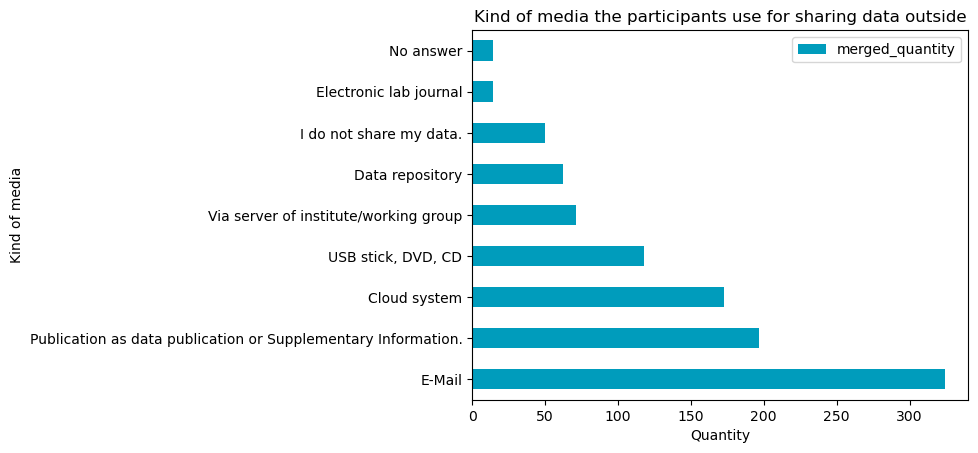

In [369]:
# Spalte "kind of media" als Index setzen
df_C003_msorted.set_index('kind of media', inplace=True)

# Zeilen mit einer Quantity von über 13 filtern
df_C003_filtered = df_C003_msorted[df_C003_msorted['merged_quantity'] > 13]

#Balkendiagramm plotten
df_C003_filtered.plot.barh(color=petrol_rgb)
plt.xlabel('Quantity')
plt.ylabel('Kind of media')
plt.title('Kind of media the participants use for sharing data outside')

plt.show()

## C04. Have you already published your data in the form of raw data, processed data or analysed data?
### Multiple selections possible.

In [370]:
# Spalten mit Namen, die "C004" enthalten, anzeigen
df_C004 = df_cleanquest_19.filter(like='C004')
df_C004

,C004,C004_01,C004_02,C004_03,C004_04,C004_05,C004_05a,C004_06
1,1,1,1,1,2,1,NaN,1
2,1,1,2,1,1,1,NaN,1
3,1,1,1,2,1,1,NaN,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,2,1,1,1,1,NaN,1
...,...,...,...,...,...,...,...,...
615,3,2,2,2,1,1,NaN,1
616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [371]:
# Leeres Dictionary für die Werte erstellen
values_dict = {}

# For-Schleife um Zeilen zu durchsuchen, bei denen die Spalte "VAR" den aktuellen Spaltennamen (column) enthält. 
for col_name in df_C004:
    values_dict[col_name] = df_values_19[df_values_19["VAR"] == col_name]

# Ergebnisse anzeigen
for col_name, values_df in values_dict.items():
    print(f"Values for {col_name}:")
    print(values_df)
    print()

Values for C004:
Empty DataFrame
Columns: [VAR, RESPONSE, MEANING]
Index: []

Values for C004_01:
         VAR  RESPONSE        MEANING
441  C004_01         1  nicht gewählt
442  C004_01         2     ausgewählt

Values for C004_02:
         VAR  RESPONSE        MEANING
443  C004_02         1  nicht gewählt
444  C004_02         2     ausgewählt

Values for C004_03:
         VAR  RESPONSE        MEANING
445  C004_03         1  nicht gewählt
446  C004_03         2     ausgewählt

Values for C004_04:
         VAR  RESPONSE        MEANING
447  C004_04         1  nicht gewählt
448  C004_04         2     ausgewählt

Values for C004_05:
         VAR  RESPONSE        MEANING
449  C004_05         1  nicht gewählt
450  C004_05         2     ausgewählt

Values for C004_05a:
Empty DataFrame
Columns: [VAR, RESPONSE, MEANING]
Index: []

Values for C004_06:
         VAR  RESPONSE        MEANING
451  C004_06         1  nicht gewählt
452  C004_06         2     ausgewählt



In [372]:
# Zeilen von Index 103 bis 110 anzeigen
selected_rows_C004 = df_variables_19.iloc[103:111]
selected_rows_C004

,VAR,LABEL,TYPE,INPUT,QUESTION
103,C004,Data publication: Ausweichoption (negativ) ode...,METRIC,SYSTEM,Have you already published your data in form ...
104,C004_01,"Data publication: Yes, as part of a text publi...",DICHOTOMOUS,CHECKBOX,Have you already published your data in form ...
105,C004_02,"Data publication: Yes, as part of a text publi...",DICHOTOMOUS,CHECKBOX,Have you already published your data in form ...
106,C004_03,"Data publication: Yes, as pure data publicatio...",DICHOTOMOUS,CHECKBOX,Have you already published your data in form ...
107,C004_04,"Data publication: No, I have not yet published...",DICHOTOMOUS,CHECKBOX,Have you already published your data in form ...
108,C004_05,Data publication: Other,DICHOTOMOUS,CHECKBOX,Have you already published your data in form ...
109,C004_05a,Data publication: Other (offene Eingabe),TEXT,OPEN,Have you already published your data in form ...
110,C004_06,Data publication: No answer,DICHOTOMOUS,CHECKBOX,Have you already published your data in form ...


In [373]:
# Spalten umbenennen, so dass Teildisziplin bekannt wird
# Dictionary erstellen
col_name_clear_C004 = {
    'C004': 'Ausweichoption (negativ) oder Anzahl',
    'C004_01': 'Yes, as part of a text publication in the form of supplemental material.',
    'C004_02': 'Yes, as part of a text publication in a data repository.',
    'C004_03': 'Yes, as pure data publication in a data repository independent on a text publication.',
    'C004_04': 'No, I have not yet published any data.',
    'C004_05': 'Other',
    'C004_05a': 'Open Text',
    'C004_06': 'No answer'
}

df_C004 = df_C004.rename(columns=col_name_clear_C004)

# Anzahl der Werte 2 in den Spalten C004_01 - C004_06 zählen und in einen df schreiben
df_C004_count = df_C004.iloc[:, 0:7].apply(lambda col: (col == '2').sum()).to_frame()

# Spalten umbenennen
df_C004_count.reset_index(inplace=True)
df_C004_count.rename(columns={'index':'kind of publication', 0:'quantity'}, inplace=True)

#Index 0 löschen
df_C004_count = df_C004_count.drop(0)

df_C004_count

,kind of publication,quantity
1,"Yes, as part of a text publication in the form...",282
2,"Yes, as part of a text publication in a data r...",82
3,"Yes, as pure data publication in a data reposi...",42
4,"No, I have not yet published any data.",155
5,Other,12
6,Open Text,0


In [374]:
# Freitextantworten und Häufigkeit zur Frage anzeigen ->Spalte C004_05a
df_C004_a = df_cleanquest_19['C004_05a'].value_counts().to_frame()

# Spalten umbenennen
df_C004_a.reset_index(inplace=True)
df_C004_a.rename(columns={'index': 'kind of publication', 'C004_05a': 'quantity'}, inplace=True)

df_C004_a

,kind of publication,quantity
0,all publications contain highly processed data,1
1,infrequently as analysed data in form of suppl...,1
2,we always publish original (raw) data,1
3,as private communication to a data repository,1
4,as Database together with companies,1
5,open acess paper with data in repository,1
6,In the form of publications in journals,1
7,part of the maintext in a publication,1
8,All our data aquired at large scale faciluties...,1
9,Yes.,1


In [375]:
# Dfs anhand des gemeinsamen Schlüssels 'kind of publication' zusammenführen
df_C004_merge = pd.merge(df_C004_count, df_C004_a, on='kind of publication', how='outer')

# Spalten quantity_x und quantity_y zu einer Spalte merged_quantity zusammenführen und Werte summieren
df_C004_merge['merged_quantity'] = df_C004_merge[['quantity_x', 'quantity_y']].sum(axis=1)

# ursprüngliche Spalten löschen
df_C004_merge.drop(['quantity_x', 'quantity_y'], axis=1, inplace=True)

df_C004_merge

,kind of publication,merged_quantity
0,"Yes, as part of a text publication in the form...",282.0
1,"Yes, as part of a text publication in a data r...",82.0
2,"Yes, as pure data publication in a data reposi...",42.0
3,"No, I have not yet published any data.",155.0
4,Other,12.0
5,Open Text,0.0
6,all publications contain highly processed data,1.0
7,infrequently as analysed data in form of suppl...,1.0
8,we always publish original (raw) data,1.0
9,as private communication to a data repository,1.0


In [376]:
# Zeilen mit Index 4 und 5 löschen, weil sie in den Freitextantworten aufgeschlüsselt wurde und als solche eingefügt wurden.
rows_to_delete_C004 = [4,5]
df_C004_merge = df_C004_merge.drop(rows_to_delete_C004)

# Ergebnisse nach Häufigkeit sortieren
df_C004_msorted = df_C004_merge.sort_values(by='merged_quantity', ascending=False)

df_C004_msorted

,kind of publication,merged_quantity
0,"Yes, as part of a text publication in the form...",282.0
3,"No, I have not yet published any data.",155.0
1,"Yes, as part of a text publication in a data r...",82.0
2,"Yes, as pure data publication in a data reposi...",42.0
6,all publications contain highly processed data,1.0
7,infrequently as analysed data in form of suppl...,1.0
8,we always publish original (raw) data,1.0
9,as private communication to a data repository,1.0
10,as Database together with companies,1.0
11,open acess paper with data in repository,1.0


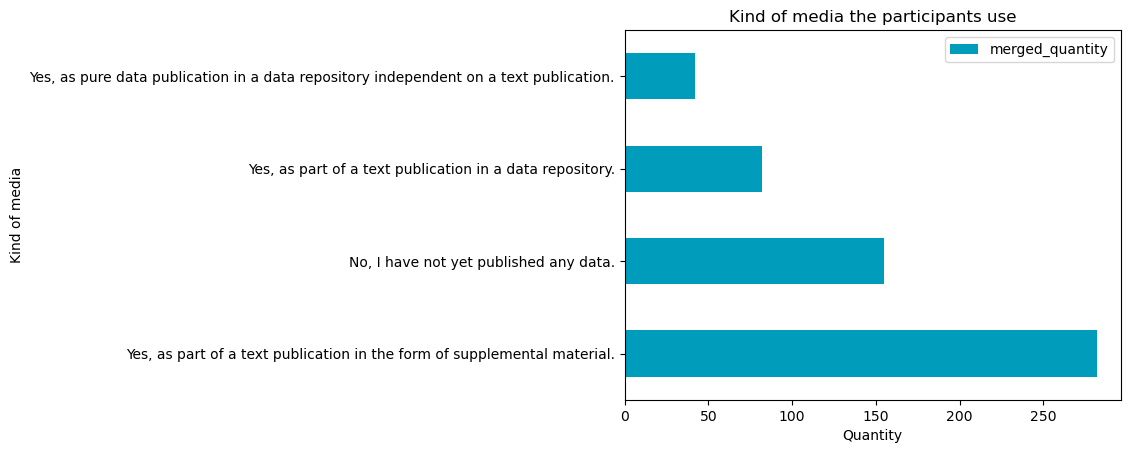

In [377]:
# Spalte "kind of media" als Index setzen
df_C004_msorted.set_index('kind of publication', inplace=True)

# Zeilen mit einer Quantity von über 40 filtern
df_C004_filtered = df_C004_msorted[df_C004_msorted['merged_quantity'] > 40]

# Balkendiagramm plotten
df_C004_filtered.plot.barh(color=petrol_rgb)
plt.xlabel('Quantity')
plt.ylabel('Kind of media')
plt.title('Kind of media the participants use')

plt.show()

##  C06. Have you re-used data provided by other scientists?
### Multiple selections possible.

In [378]:
# Spalten mit Namen, die "C006" enthalten, anzeigen
df_C006 = df_cleanquest_19.filter(like='C006')
df_C006

,C006,C006_01,C006_02,C006_03,C006_04,C006_05,C006_06,C006_07,C006_08,C006_08a,C006_09
1,1,1,1,1,1,1,1,2,1,NaN,1
2,1,1,1,1,2,1,1,1,1,NaN,1
3,3,2,2,1,2,1,1,1,1,NaN,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,1,1,1,1,1,2,1,1,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
615,4,2,2,2,2,1,1,1,1,NaN,1
616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [379]:
# Leeres Dictionary für die Werte erstellen
values_dict = {}

# For-Schleife um Zeilen zu durchsuchen, bei denen die Spalte "VAR" den aktuellen Spaltennamen (column) enthält. 
# Ergebnis in values_dict speichern
for col_name in df_C006:
    values_dict[col_name] = df_values_19[df_values_19["VAR"] == col_name]

# Ergebnisse anzeigen
for col_name, values_df in values_dict.items():
    print(f"Values for {col_name}:")
    print(values_df)
    print()

Values for C006:
Empty DataFrame
Columns: [VAR, RESPONSE, MEANING]
Index: []

Values for C006_01:
         VAR  RESPONSE        MEANING
456  C006_01         1  nicht gewählt
457  C006_01         2     ausgewählt

Values for C006_02:
         VAR  RESPONSE        MEANING
458  C006_02         1  nicht gewählt
459  C006_02         2     ausgewählt

Values for C006_03:
         VAR  RESPONSE        MEANING
460  C006_03         1  nicht gewählt
461  C006_03         2     ausgewählt

Values for C006_04:
         VAR  RESPONSE        MEANING
462  C006_04         1  nicht gewählt
463  C006_04         2     ausgewählt

Values for C006_05:
         VAR  RESPONSE        MEANING
464  C006_05         1  nicht gewählt
465  C006_05         2     ausgewählt

Values for C006_06:
         VAR  RESPONSE        MEANING
466  C006_06         1  nicht gewählt
467  C006_06         2     ausgewählt

Values for C006_07:
         VAR  RESPONSE        MEANING
468  C006_07         1  nicht gewählt
469  C006_07    

In [380]:
# Zeilen von Index 113 bis 123 anzeigen
selected_rows_C006 = df_variables_19.iloc[113:124]
selected_rows_C006

,VAR,LABEL,TYPE,INPUT,QUESTION
113,C006,Data reuse: Ausweichoption (negativ) oder Anza...,METRIC,SYSTEM,Did you re-use yourself data provided by other...
114,C006_01,"Data reuse: Yes, data by a colleague from the ...",DICHOTOMOUS,CHECKBOX,Did you re-use yourself data provided by other...
115,C006_02,"Data reuse: Yes, data by a colleague from anot...",DICHOTOMOUS,CHECKBOX,Did you re-use yourself data provided by other...
116,C006_03,"Data reuse: Yes, data from supplemental materi...",DICHOTOMOUS,CHECKBOX,Did you re-use yourself data provided by other...
117,C006_04,"Data reuse: Yes, data from a data repository",DICHOTOMOUS,CHECKBOX,Did you re-use yourself data provided by other...
118,C006_05,"Data reuse: No, the desired data were not suff...",DICHOTOMOUS,CHECKBOX,Did you re-use yourself data provided by other...
119,C006_06,"Data reuse: No, I do not trust data from others",DICHOTOMOUS,CHECKBOX,Did you re-use yourself data provided by other...
120,C006_07,"Data reuse: No, until now, it was not required...",DICHOTOMOUS,CHECKBOX,Did you re-use yourself data provided by other...
121,C006_08,"Data reuse: No, because",DICHOTOMOUS,CHECKBOX,Did you re-use yourself data provided by other...
122,C006_08a,"Data reuse: No, because (offene Eingabe)",TEXT,OPEN,Did you re-use yourself data provided by other...


In [381]:
# Spalten umbenennen, so dass Antworten bekannt wird
# Dictionary erstellen
col_name_clear_C006 = {
    'C006': 'Ausweichoption (negativ) oder Anzahl',
    'C006_01': 'Yes, data by a colleague from the same institute/working group.',
    'C006_02': 'Yes, data by a colleague from another institute.',
    'C006_03': 'Yes, data from supplemental materials of a publication.',
    'C006_04': 'Yes, data from a data repository.',
    'C006_05': 'No, the desired data were not sufficiently described.',
    'C006_06': 'No, I do not trust data from others.',
    'C006_07': 'No, until now, it was not required to use other data.',
    'C006_08': 'No, because',
    'C006_08a': 'No, open text',
    'C006_09': 'No answer'
}

df_C006 = df_C006.rename(columns=col_name_clear_C006)

# Anzahl der Werte 2 in den Spalten C006_01 - C006_09 zählen und in einen df schreiben
df_C006_count = df_C006.iloc[:, 0:10].apply(lambda col: (col == '2').sum()).to_frame()

# Spalten umbenennen
df_C006_count.reset_index(inplace=True)
df_C006_count.rename(columns={'index':'re-use of data', 0:'quantity'}, inplace=True)

df_C006_count

,re-use of data,quantity
0,Ausweichoption (negativ) oder Anzahl,124
1,"Yes, data by a colleague from the same institu...",240
2,"Yes, data by a colleague from another institute.",161
3,"Yes, data from supplemental materials of a pub...",167
4,"Yes, data from a data repository.",81
5,"No, the desired data were not sufficiently des...",30
6,"No, I do not trust data from others.",24
7,"No, until now, it was not required to use othe...",131
8,"No, because",12
9,"No, open text",0


In [382]:
# Freitextantworten und Häufigkeit zur Frage anzeigen ->Spalte C006_08a "No, because"
df_C006_count_b = df_cleanquest_19['C006_08a'].value_counts().to_frame()

# Spalten umbenennen
df_C006_count_b.reset_index(inplace=True)
df_C006_count_b.rename(columns={'index': 're-use of data', 'C006_08a': 'quantity'}, inplace=True)

df_C006_count_b

,re-use of data,quantity
0,Data was simply not available when I thought i...,1
1,"What does ""re-use"" mean in this context? Publi...",1
2,only as comparison!,1
3,they do not exist,1
4,Published data was found to be wrong,1
5,I measure all my data on my own,1
6,they do not fit to our experiments,1
7,we work for companies,1
8,"the sense of science is to generate data, not ...",1
9,Data was not available,1


In [383]:
# Zeilen mit Index 8 und 9 löschen, weil sie freien Text beinhalten.
indices_to_drop = [8, 9]
df_C006_count.drop(indices_to_drop, inplace=True)

# Ergebnisse nach Häufigkeit sortieren
df_C006_sorted = df_C006_count.sort_values(by='quantity', ascending=False)

df_C006_sorted

,re-use of data,quantity
1,"Yes, data by a colleague from the same institu...",240
3,"Yes, data from supplemental materials of a pub...",167
2,"Yes, data by a colleague from another institute.",161
7,"No, until now, it was not required to use othe...",131
0,Ausweichoption (negativ) oder Anzahl,124
4,"Yes, data from a data repository.",81
5,"No, the desired data were not sufficiently des...",30
6,"No, I do not trust data from others.",24


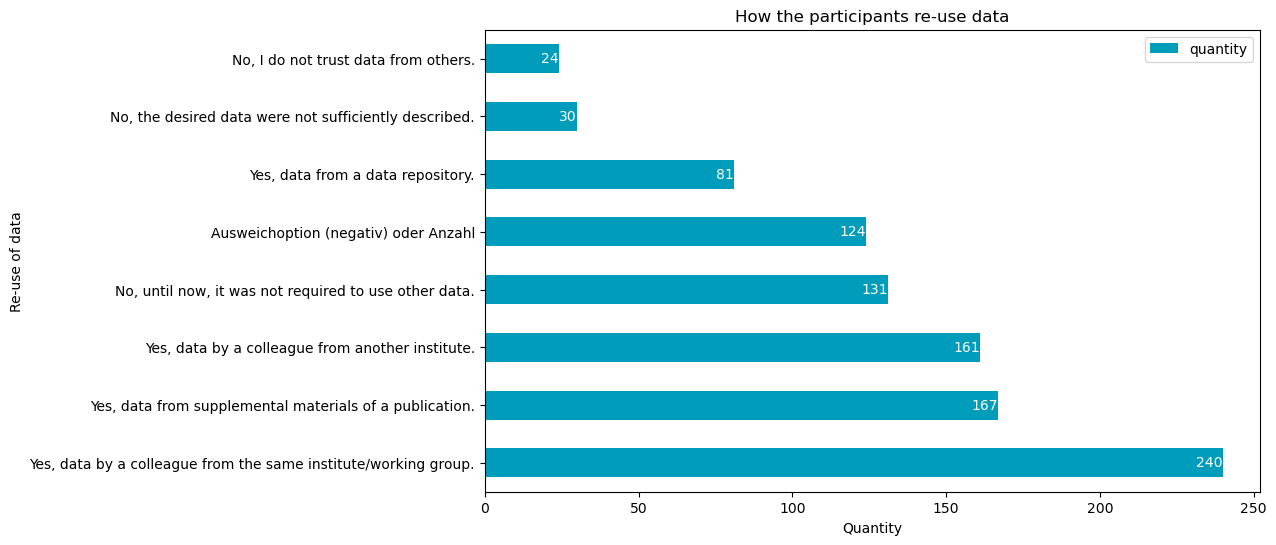

In [384]:
# Größe des Diagramms anpassen
fig, ax = plt.subplots(figsize=(10, 6))

# Spalte "re-use of data" als Index setzen
df_C006_sorted.set_index('re-use of data', inplace=True)

# Balkendiagramm plotten, wobei absolute Werte angezeigt werden sollen
bars = df_C006_sorted.plot.barh(ax=ax, color=petrol_rgb)

# absolute Werte in die Balken einfügen
for bar in bars.patches:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, int(bar.get_width()),
            va='center', ha='right', color='white')

plt.xlabel('Quantity')
plt.ylabel('Re-use of data')
plt.title('How the participants re-use data')

plt.show()